In [1]:
#모델 평가
#훈련 세트 크기에 따른 영향 시각화

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits() # 데이터 로드
features, target = digits.data, digits.target # 특성 행렬과 타깃 벡터 분리

# 다양한 훈련 세트 크기에서 교차검증 훈련 점수와 테스트 점수를 계산합니다.
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), # 분류기
                                                        features, # 특성 행렬
                                                        target, # 타깃 벡터
                                                        cv=10, # 폴드 수
                                                        scoring='accuracy', # 성능 지표
                                                        n_jobs=-1, # 모든 코어 사용
                                                        train_sizes=np.linspace( 0.01, 1.0, 50)) # 50개의 훈련 세트 크기

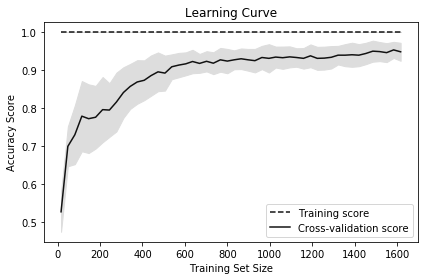

[  16   48   81  114  146  179  212  244  277  310  342  375  408  440
  473  506  538  571  604  636  669  702  734  767  800  832  865  898
  930  963  996 1028 1061 1094 1126 1159 1192 1224 1257 1290 1322 1355
 1388 1420 1453 1486 1518 1551 1584 1617]


In [2]:
# 훈련 세트 점수의 평균과 표준 편차를 계산합니다.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준 편차를 계산합니다.
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# 그래프를 그립니다.
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# 표준 편차 영역을 그립니다.
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# 그래프를 출력합니다.
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()
print(train_sizes)
#훈련 세트 샘플의 1%에서 100%까지 50개 크기에서 랜덤 포레스트 분류기의 정확도를 그래프로 출력합니다.
#모델의 교차검증 정확도가 증가하면 추가적인 샘플이 도움이 된다는 것을 의미합니다.

In [13]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report #분류 리포트

iris = datasets.load_iris() # 데이터 로드
features, target = iris.data, iris.target
class_names = iris.target_names # 타깃 클래스 이름의 리스트

# 훈련 세트와 테스트 세트를 만듭니다.
features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)
clf = LogisticRegression(max_iter=150) # 로지스틱 회귀 모델 객체 생성, max_iter 관련 오류 나서 값 좀 높여줌
model = clf.fit(features_train, target_train) # 모델 훈련
target_predicted = model.predict(features_test) # 예측

print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names)) # 분류 리포트 생성

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [14]:
# 분류 리포트를 만듭니다.
print(classification_report(target_test, target_predicted, labels=[0,1,2,3])) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9
           3       0.00      0.00      0.00         0

   micro avg       0.97      0.97      0.97        38
   macro avg       0.72      0.73      0.73        38
weighted avg       0.98      0.97      0.97        38



C:\Users\Yubin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Yubin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
# 분류 리포트를 만듭니다.
print(classification_report(target_test, target_predicted, labels=[0,1,2,3], zero_division=True))
#오류 나길래 zero_division=True 주니 macr avg에서 값 차이 많이 남

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00         0

   micro avg       0.97      0.97      0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



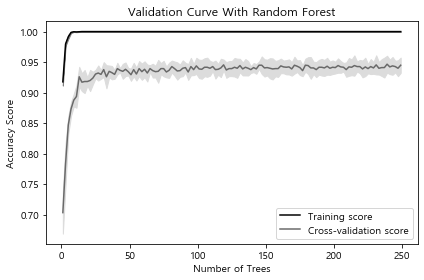

In [36]:
#하이퍼파라미터 값의 영향 시각화
#실습: 트리 개수가 증가할 때 랜덤 포레스트 분류기의 훈련 세트 정확도와 교차검증 정확도의 변화를 시각화
#검증 곡선을 그려 모델의 하이퍼파라미터 값 변화에 따른 성능 변화 확인
#랜덤 포레스트 분류기의 하이퍼파라미터는 앙상블을 할 트리의 개수
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import validation_curve

digits = load_digits()
features, target = digits.data, digits.target

param_range = np.arange(1, 250, 2) #비교해볼 파라미터 값의 범위
train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                            features,
                                            target,
                                            param_name='n_estimators', #조사할 하이퍼파라미터 이름
                                            param_range=param_range, #하이퍼파라미터 값의 범위
                                            cv=3, #폴드 수
                                            scoring='accuracy', #성능 지표
                                            n_jobs=-1) #모든 코어 사용

#훈련과 테스트 세트 점수의 평균과 표준 편차 계산
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

#훈련 세트와 테스트 세트의 평균 정확도 점수를 그래프로
plt.plot(param_range, train_mean, label='Training score', color='black')
plt.plot(param_range, test_mean, label='Cross-validation score', color='dimgrey')

#훈련 세트와 테스트 세트의 정확도에 대한 표준 편차를 그래프로
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color='gray')
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color='gainsboro')
#mean위아래로 1 std만큼씩 벌어진 선을 색을 채워 그려넣는 코드

plt.title('Validation Curve With Random Forest')
plt.xlabel('Number of Trees'), plt.ylabel('Accuracy Score')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [37]:
#선형 회귀 - 보스턴 집값 예측 회귀 분석
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

boston = load_boston()
dir(boston)

dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])

df = pd.concat([dfX, dfy], axis=1)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


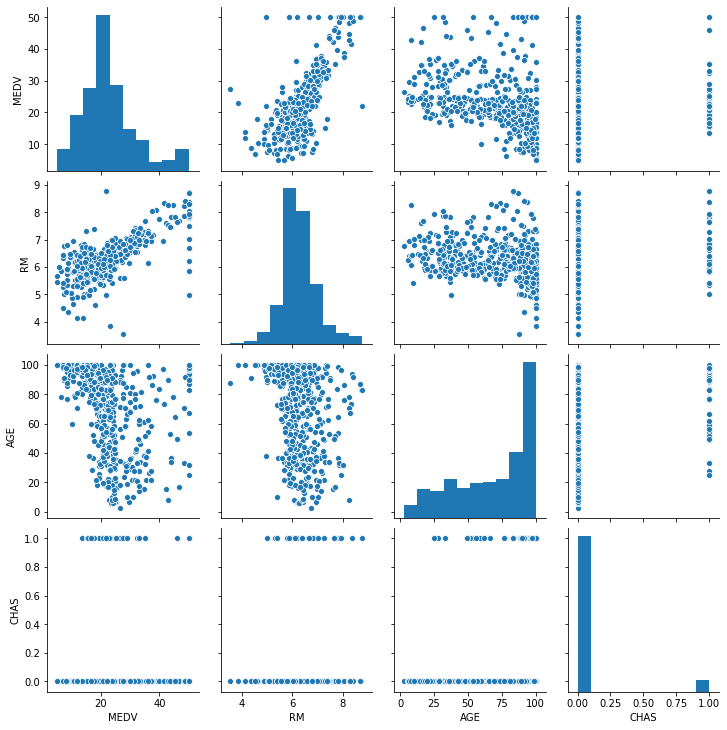

In [8]:
sns.pairplot(df[['MEDV', 'RM', 'AGE', 'CHAS']])
plt.show()

In [9]:
#당뇨병 진행도 예측
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


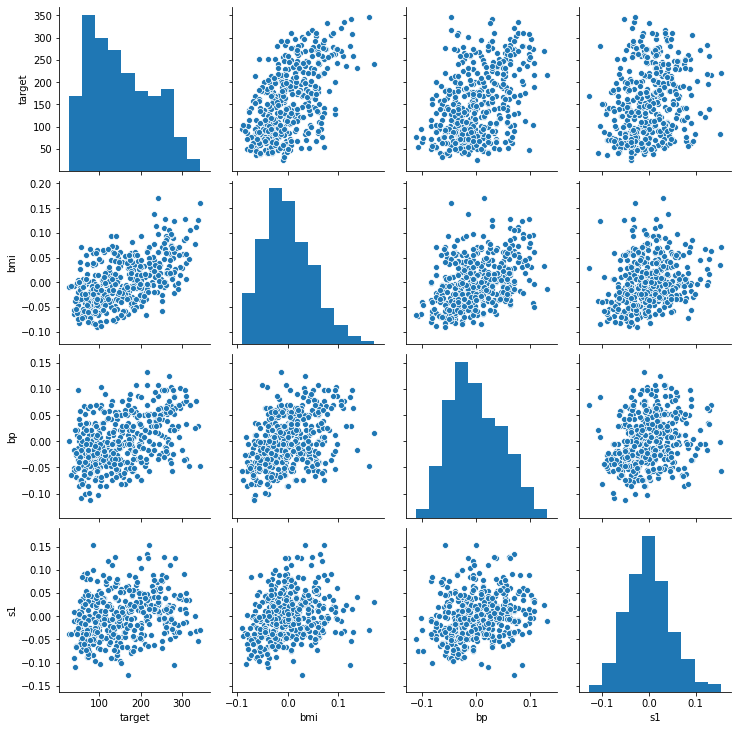

In [10]:
sns.pairplot(df[['target', 'bmi', 'bp', 's1']])
plt.show()
#bmi와 bp(평균혈압)도 양의 상관관계 - 이렇듯 독립변수끼리 상관관계를 가지는 것을 다중공선성이라고 함
#이는 회귀분석 결과에 영향을 미침

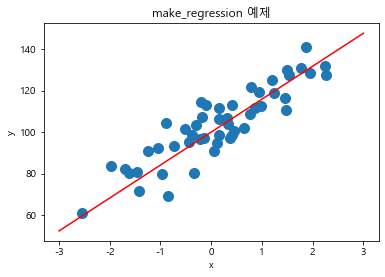

In [21]:
#회귀분석 - make_regression() 사용 [pdf_08 - page_16]
from sklearn.datasets import make_regression
import matplotlib as mpl
X, y, w = make_regression(n_samples=50, n_features=1,
                          bias=100, noise=10, coef=True,
                          random_state=0 )
xx = np.linspace(-3, 3, 100)
y0 = w * xx + 100

mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

plt.plot(xx, y0, "r-")
plt.scatter(X, y, s=100)

plt.xlabel("x")
plt.ylabel("y")
plt.title("make_regression 예제")
plt.show()

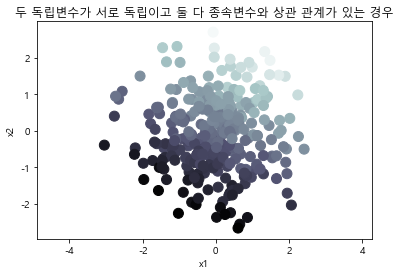

In [22]:
import matplotlib as mpl
X, y, w = make_regression( n_samples=300, n_features=2,
                          noise=10, coef=True,
                          random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 다 종속변수와 상관 관계가 있는 경우")
plt.show()

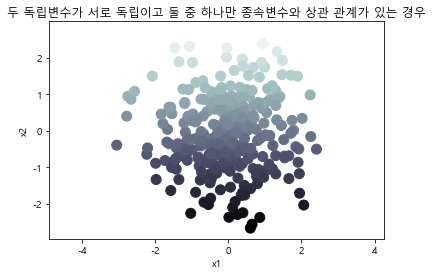

In [50]:
X, y, w = make_regression(n_samples=300, n_features=2,
                          n_informative=1, #종속변수와 상관 관계가 있는 독립변수의 수 default = 10?
                          noise=0, coef=True,
                          random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 서로 독립이고 둘 중 하나만 종속변수와 상관 관계가 있는 경우")
plt.show()

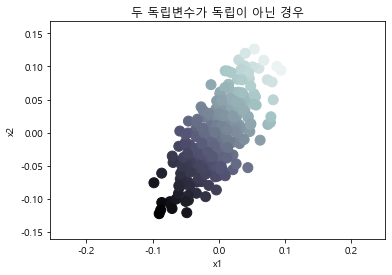

In [31]:
X, y, w = make_regression(n_samples=300, n_features=2,
                          effective_rank=1, #독립 변수 중 서로 독립인 독립변수의 수 (변수는 둘인데 하나만 effective하므로 나머지 하나는 다른 독립변수에 종속? - 그래서 2 넣었을 때랑 None 넣었을 때랑 비슷한 결과?)
                          noise=0, coef=True,
                          random_state=0,
tail_strength=0 )
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=mpl.cm.bone)
plt.xlabel("x1")
plt.ylabel("x2")
plt.axis("equal")
plt.title("두 독립변수가 독립이 아닌 경우") #다중공선성 문제가 있는 경우
plt.show()

In [32]:
#선형회귀 분석 - 최소자승법: 잔차제곱합 RSS을 최소화하는 가중치 벡터를 구하는 방법
from sklearn.datasets import make_regression
import numpy as np

#numpy의 선형대수 기능을 사용하여 OLS 방법으로 선형 회귀분석 수행
import statsmodels.api as sm

bias = 100

X0, y, w = make_regression(n_samples=200, n_features=1,
                          bias=bias, noise=10,
                          coef=True, random_state=1)
#statsmodels 패키지의 상수항 결합을 위한 add_constant 함수
#1의 값을 갖는 열이 추가됨
X = sm.add_constant(X0)
y = y.reshape(len(y),1)
w #x와 y 관계: y = 100 + 86.44794301x + e

array(86.44794301)

In [33]:
#최소자승법(Ordinary Least Squares ,OLS) 해를 직접 이용하는 방법으로 선형 회귀 계수 추정
#OLS 식: (X^T * X)^-1 * X^T * y 를 그대로 적은 것, 여기서 *은 행렬의 내적곱
w = np.linalg.inv(X.T @X) @ X.T @y
#행렬 내적 계산: (X.T @X) = np.dot(X.T, X)
w
#똑같지는 않음

array([[99.79150869],
       [86.96171201]])

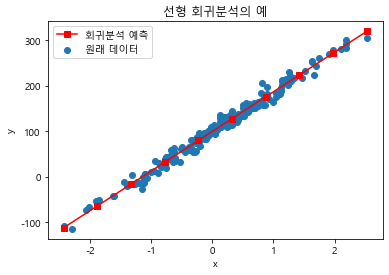

In [34]:
# 원래 데이터와 비교
import matplotlib as mpl
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

x_new = np.linspace(np.min(X0), np.max(X0), 10)
X_new = sm.add_constant(x_new) # 상수항 결합
y_new = np.dot(X_new, w)

plt.scatter(X0, y, label="원래 데이터")
plt.plot(x_new, y_new, 'rs-', label="회귀분석 예측")

plt.xlabel("x")
plt.ylabel("y")
plt.title("선형 회귀분석의 예")
plt.legend()
plt.show()

In [35]:
#scikit-learn 패키지 이용한 선형 회귀분석 - linear_model 서브 패키지의 LinearRegression
from sklearn.linear_model import LinearRegression
#매개변수 fit_intercept=Ture 주면 모형에 상수항 있다고 가정
model = LinearRegression().fit(X0,y) #가중치 값 추정, 상수항 결합 자동 수행
#coef_: 추정된 가중치 벡터, intercept_: 추정된 상수항

#새로운 입력 데이터에 대한 출력 데이터 예측
model.predict([[-2],[-1],[0],[1],[2]])

array([[-74.13191534],
       [ 12.82979668],
       [ 99.79150869],
       [186.7532207 ],
       [273.71493272]])

In [67]:
#선형회귀 - statsmodels 패키지의 OLS 클래스 이용
import statsmodels.api as sm
from sklearn.datasets import load_boston

boston = load_boston()

#일단 X 만들고
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
#거기에 상수항 더해줘야 진짜_최종_최종_X
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])

model_boston2 = sm.OLS(dfy, dfX) #OLS 구하고
result_boston2 = model_boston2.fit() #fit으로 모형 추정
#print(result_boston2.predict([0,10,0,0,0,20,0,0,0,0,0,0,0,15])) #14개 feature의 new data를 예측하는 경우 (예시)
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          6.72e-135
Time:                        23:03:12   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [79]:
#선형회귀 - Linear Regression - 편향, 특성의 계수, 타깃 벡터의 값
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
boston = load_boston()
features = boston.data[:,0:2] #데이터를 로드하고 두 개의 특성(CRIM, ZN)만 선택
target = boston.target
print(boston.feature_names)

regression = LinearRegression() # 선형 회귀 모델을 만듭니다.
model = regression.fit(features, target) # 선형 회귀 모델을 훈련합니다.

print('편향(상수항):', model.intercept_) # 편향을 확인합니다.
print('특성의 계수:', model.coef_) # 특성의 계수를 확인합니다.
target[0]*1000 # 타깃 벡터의 첫 번째 값에 1000을 곱한 값. (단위가 천 달러이므로)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
편향(상수항): 22.485628113468223
특성의 계수: [-0.35207832  0.11610909]


24000.0

In [80]:
print('1번 데이터의 집값 예측 ($):', model.predict(features)[0]*1000)
print('첫 번째 독립변수 범죄율의 계수:', model.coef_[0]*1000)

1번 데이터의 집값 예측 ($): 24573.366631705547
첫 번째 독립변수 범죄율의 계수: -352.0783156402677


In [84]:
#다항 회귀: 독립변수의 단항식이 아닌 2차, 3차 방정식 곡선형으로 표현됨
#사이킷런에서는 PolynomialFeatures 클래스를 통해 피처를 다항 피처로 변환
#차수가 높아질수록 복잡한 피처 간 관계도 모델링 가능하지만 테스트 환경에서 예측 정확도는 오히려 떨어짐
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

boston = load_boston()
features = boston.data[:,0:2] #데이터를 로드하고 두 개의 특성만 선택
target = boston.target

# 교차 항(x1 * x2 같은)을 만듭니다.
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
features_interaction = interaction.fit_transform(features) #교차 항으로 만든 데이터

regression = LinearRegression() # 선형 회귀 모델 객체 생성
model = regression.fit(features_interaction, target) # 선형 회귀 모델 훈련
print(features[0], end = ' ') #원래 features의 첫 번째 샘플 특성 값

import numpy as np
#각 샘플에서 첫 번째와 두 번째 특성을 곱합니다.
interaction_term = np.multiply(features[:, 0], features[:, 1])
print(interaction_term[0]) #첫 번째 샘플의 교차 항을 확인.
print(features_interaction[0]) #교차 항 값 같음을 확인(세 번째 값)

[6.32e-03 1.80e+01] 0.11376
[6.3200e-03 1.8000e+01 1.1376e-01]


In [93]:
#비선형 관계 학습
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures

boston = load_boston() # 데이터를 로드하고 하나의 특성을 선택
features = boston.data[:,0:1]
target = boston.target

# 다항 특성 x^2와 x^3를 만듭니다.
polynomial = PolynomialFeatures(degree=3, include_bias=False)
features_polynomial = polynomial.fit_transform(features)

regression = LinearRegression() # 선형 회귀 모델 객체 생성
model = regression.fit(features_polynomial, target) # 선형 회귀 모델 훈련

features[0] # 첫 번째 샘플을 확인
features[0]**2 # 첫 번째 샘플을 x^2로 거듭제곱합니다.
features[0]**3 # 첫 번째 샘플을 x^2로 세제곱합니다.
features_polynomial[0] # 첫 번째 샘플의 x, x^2,x^3 값을 확인

array([6.32000000e-03, 3.99424000e-05, 2.52435968e-07])

In [117]:
#단순 선형 회귀에는 편향과 분산이 발생
#둘은 트레이드오프 관계

#비용함수 목표 = Min(RSS(W) + alpha*||W||^2_2)
#alpha를 증가시키며 회귀 계수 값의 크기를 감소시키는 페널티를 부여하는
#회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 규제(Regularization)

#alpha=0이면 W가 커도 전체 값은 0이 되므로 비용 함수는 MinRSS(W()
#alpha가 커질수록 2번째 항도 커지므로 W를 줄여야하게 됨

#규제의 종류 - 릿지 회귀(L2-Norm 이용), 라쏘 회귀(L1-Norm), 엘라스틱 넷(앞의 둘의 정규화 항을 합쳐 r로 규제 정도를 조절)

#릿지 회귀
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

boston = load_boston() # 데이터 로드
features = boston.data
target = boston.target

scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)

regression = Ridge(alpha=0.5) #alpha 값을 지정한 릿지 회귀를 만듭니다.
model = regression.fit(features_standardized, target) #선형 회귀 모델을 훈련합니다.

model.intercept_
model.coef_
regression.score(features_standardized, target) #훈련 세트의 정확도

0.7406395408018002

In [121]:
from sklearn.linear_model import RidgeCV

regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0]) # 세 개의 alpha 값에 대한 릿지 회귀 객체 생성
model_cv = regr_cv.fit(features_standardized, target) # 선형 회귀 모델 훈련
print(model_cv.coef_) # 계수 확인
print(model_cv.alpha_) #(선택된?)alpha 값을 확인

regr_cv = RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5) # 5-폴드 교차검증을 사용하여 릿지 회귀 객체 생성
model_cv = regr_cv.fit(features_standardized, target) # 선형 회귀 모델을 훈련합니다.
print(model_cv.alpha_) # alpha 값을 확인
print(model_cv.score(features_standardized, target)) #훈련 세트 정확도

[-0.91987132  1.06646104  0.11738487  0.68512693 -2.02901013  2.68275376
  0.01315848 -3.07733968  2.59153764 -2.0105579  -2.05238455  0.84884839
 -3.73066646]
1.0
10.0
0.7397807784359685


In [131]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

boston = load_boston() # 데이터 로드
features = boston.data
target = boston.target

scaler = StandardScaler() # 특성 표준화
features_standardized = scaler.fit_transform(features)

regression = Lasso(alpha=0.5) # alpha 값을 지정한 라쏘 회귀 객체 생성
model = regression.fit(features_standardized, target) # 선형 회귀 모델 훈련
print(model.coef_) # 계수 확인

regression_a10 = Lasso(alpha=10) # 큰 alpha 값을 지정한 라쏘 회귀 객체 생성
model_a10 = regression_a10.fit(features_standardized, target)
model_a10.coef_ #알파 값이 커서 다 선택 안 됨

[-0.11526463  0.         -0.          0.39707879 -0.          2.97425861
 -0.         -0.17056942 -0.         -0.         -1.59844856  0.54313871
 -3.66614361]


array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0., -0.,  0., -0.])

In [126]:
#로지스틱 회귀 - 이진 분류기
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
features, target = iris.data[:100,:], iris.target[:100]
#이진 분류를 위해 클래스는 두 개만 선택(iris는 총 150개의 샘플이 50개씩 세 개의 분류로 나뉨 - 따라서 100개까지만 쓰면 두 개의 분류)

scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)

logistic_regression = LogisticRegression(random_state=0)
model = logistic_regression.fit(features_standardized, target)

new_observation = [[.5, .5, .5, .5]]
model.predict(new_observation)
#클래스 1로 분류함

array([1])

In [127]:
model.predict_proba(new_observation)

array([[0.17738424, 0.82261576]])

In [128]:
#다중 클래스 분류기 - one-vs-rest(OVR): 개별 모델은 샘플이 해당 클래스에 속하는지 여부를 예측 (이진 분류 문제)
#개별 분류 문제는 독립적이라고 가정
#다항 로지스틱 회귀(multinomial logistic regression, MLR)는 로지스틱 함수를 소프트맥스 함수로 바꿈
#MLR은 predict_proba()를 사용해 예측한 확률을 더 신뢰할 수 있음(보정이 잘 되어있다.)
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() # 데이터 로드
features, target = iris.data, iris.target

scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)

# OVR 로지스틱 회귀 모델을 만듭니다.
logistic_regression = LogisticRegression(random_state=0, multi_class="ovr")
#logistic_regression = LogisticRegression(random_state=0, multi_class="multinomial")
model = logistic_regression.fit(features_standardized, target)
model.predict(new_observation)

array([2])

In [129]:
model.predict_proba(new_observation)

array([[0.0387617 , 0.40669108, 0.55454723]])

In [141]:
#규제로 분산 줄이기
from sklearn.linear_model import LogisticRegressionCV
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() # 데이터를 로드
features = iris.data
target = iris.target

scaler = StandardScaler() # 특성을 표준화
features_standardized = scaler.fit_transform(features)

# 로지스틱 회귀 모델 객체 생성
logistic_regression = LogisticRegressionCV(penalty='l2', Cs=10, random_state=0, n_jobs=-1)
#penalty로 규제의 유형 설정, Cs는 탐색할 C의 범위 - Cs 값이 작을수록 규제는 강함
model = logistic_regression.fit(features_standardized, target) # 모델 훈련

logistic_regression.C_
#C는 규제 강도를 조절하는 alpha 값의 역수

array([21.5443469, 21.5443469, 21.5443469])

In [78]:
#대용량 데이터에서 분류기 훈련 - solver 매개변수를 확률적 평균 경사 하강법으로 지정
#확률적 평균 경사 하강법이 다른 방법보다 훨씬 빠르게 모델을 훈련시킴
#이는 특성의 스케일에 매우 민감하므로 특성 표준화가 매우 중요
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() # 데이터 로드
features = iris.data
target = iris.target

scaler = StandardScaler() # 특성 표준화
features_standardized = scaler.fit_transform(features)

# 로지스틱 회귀 모델 생성
logistic_regression = LogisticRegression(random_state=0, solver="sag")
model = logistic_regression.fit(features_standardized, target) # 모델 훈련

model.predict(new_observation)

array([1])

In [ ]:
#불균형한 클래스 다루기
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris() #데이터 로드
features = iris.data
target = iris.target
features = features[40:,:] #처음 40개 샘플을 제거
target = target[40:] #불균형한 클래스를 만듭니다.

#타깃 벡터에서 0이 아닌 클래스는 모두 1로 만듭니다.
target = np.where((target == 0), 0, 1)
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features) #특성을 표준화

#로지스틱 회귀 모델 생성
logistic_regression = LogisticRegression(random_state=0, class_weight="balanced")
model = logistic_regression.fit(features_standardized, target) #모델 훈련

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#클래스 레이블이 0, 1인 데이터의 클래스 가중치를 계산합니다.
compute_class_weight('balanced', [0, 1], target)

#10:1의 클래스 가중치를 부여한 로지스틱 회귀 모델을 만듭니다.
logistic_regression = LogisticRegression(random_state=0, class_weight={0:10, 1:1})
model = logistic_regression.fit(features_standardized, target) # 모델 훈련